In [1]:
#!pip install python-binance
from binance import Client
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
import schedule
import math
import scipy.stats as st
import statistics
import smtplib
import os
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.keys import Keys
from time import sleep  

In [ ]:
api_key="pTZlrkaCbTEoa17nor24Tw53OWYFlMBQIOmaftSLcjg5lASfhZ0048zcxOZLrBgN"
api_secret="PxcyhPku5uQon1krBa3glze2sF7oZQ3gqb9GRVkh25OFvCtyAkML139l4z9d9BwG"
client=Client(api_key,api_secret)
client.get_account()

In [6]:
#Getting the historical data of the bitcoin prices
hist_data=pd.DataFrame(client.get_historical_klines('BTCUSDT', '1m', '30 min ago UTC-5'))
display(hist_data)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1648338480000,44547.99000000,44556.37000000,44542.49000000,44551.05000000,12.91348000,1648338539999,575288.42005300,361,8.20953000,365726.07875810,0
1,1648338540000,44551.05000000,44551.05000000,44536.90000000,44536.90000000,12.39021000,1648338599999,551860.40825640,333,4.31873000,192353.28220160,0
2,1648338600000,44536.90000000,44538.27000000,44529.93000000,44530.41000000,6.51879000,1648338659999,290311.69091570,328,3.15772000,140621.84998950,0
3,1648338660000,44530.41000000,44541.69000000,44530.41000000,44541.69000000,6.79088000,1648338719999,302431.45856270,300,3.23388000,144018.21733730,0
4,1648338720000,44541.68000000,44542.13000000,44537.13000000,44542.12000000,8.25561000,1648338779999,367704.98693030,355,2.88096000,128317.06984690,0
5,1648338780000,44542.12000000,44542.13000000,44521.50000000,44521.51000000,5.66730000,1648338839999,252382.52351330,360,1.84920000,82349.61819080,0
6,1648338840000,44521.50000000,44521.51000000,44487.99000000,44488.00000000,33.95196000,1648338899999,1511119.88927360,896,6.18915000,275483.68890080,0
7,1648338900000,44488.00000000,44491.13000000,44477.03000000,44485.12000000,18.34259000,1648338959999,815941.12958880,602,11.39746000,506984.36746150,0
8,1648338960000,44485.12000000,44485.12000000,44478.74000000,44480.00000000,5.05738000,1648339019999,224961.30720720,365,2.61002000,116098.59528550,0
9,1648339020000,44479.99000000,44490.17000000,44479.99000000,44490.17000000,10.24472000,1648339079999,455740.57635500,416,6.12403000,272426.37941730,0


In [10]:
def getminutedata(symbol, interval, lookback):
    frame=pd.DataFrame(client.get_historical_klines(symbol,interval,lookback))
    frame=frame.iloc[:,:6]
    frame.columns=['Time','Open','High','Low', 'Close','Volume']
    frame=frame.set_index('Time')
    frame.index=pd.to_datetime(frame.index,unit='ms')
    frame = frame.astype(float)
    return frame

In [13]:
test=getminutedata('BTCUSDT','1m','30 min ago UTC-5')

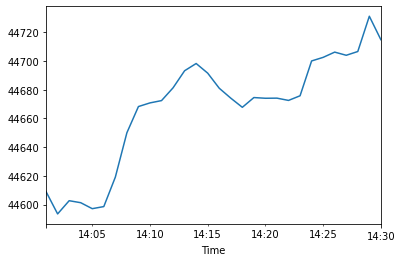

In [14]:
test.Open.plot()

In [15]:
#buy if asset fell by more than 1% within the last 30 min
#sell if asset rises by more than 0.15% or falls further by 0.15%
def strategytest(symbol, qty, entried=False):
    df= getminutedata(symbol,'1m','30m')
    cumulret=(df.open.pct_change()+1).cumprod()-1
    if not entried:
        if cumulret[-1]<-0.02:
            order=client.create_order(symbol,side='BUY', type='MARKET', quantity=qty)
            print(order)
            entried=True
        else:
            print('no trade has been executed')
            
    if entried:
        while True:
            df= getminutedata(symbol,'1m','30m')
            #Getting the time that I bought
            sincebuy=df.loc[df.index > pd.to_datetime(order['transactTime'],unit='ms') ]
            if len(sincebuy)>0:
                sinceBuyRet=(df.open.pct_change()+1).cumprod()-1
                if sinceBuyRet[-1]>0.0015 or sincebuyret[-1]<0.0015:
                    order=client.create_order(symbol=symbol, side='SELL', type='MARKET', quantity=qty)
                    
                    print(order)
                    break

                    

    
    
    
    
    
    
    
    
    
    
    

In [41]:
driver=webdriver.Chrome(executable_path="C:/Users/57314/Documents/chromedriver.exe")
driver.get("https://www.binance.com/en/markets/spot-USDT")
driver.maximize_window()

In [2]:
#Getting all the possible combinations for USDT
html_text_main=requests.get("https://www.binance.com/en/markets/spot-USDT").text
#we make an instance of the beatiful instante
soup_main=BeautifulSoup(html_text_main,"lxml")


market=soup_main.find("div",class_="css-1vuj9rf").find_all("div",class_="css-vlibs4")

cryptoList=list()
for crypto in market:
    exchange=crypto.find("div",class_="css-14yoi5o").text
    symbol=exchange.replace("/","")
    cryptoList.append(symbol)
    
print(cryptoList)



























['GMTUSDT', 'BTCUSDT', 'ETHUSDT', 'BUSDUSDT', 'LUNAUSDT', 'WAVESUSDT', 'SOLUSDT', 'ETCUSDT', 'SHIBUSDT', 'BNBUSDT', 'AVAXUSDT', 'FILUSDT', 'LRCUSDT', 'APEUSDT', 'NEARUSDT', 'LOKAUSDT', 'GALAUSDT', 'XRPUSDT', 'AAVEUSDT', 'RUNEUSDT', 'ADAUSDT', 'ZILUSDT', 'USDCUSDT', 'DOTUSDT', 'CHZUSDT', 'DOGEUSDT', 'AXSUSDT', 'ATOMUSDT', 'FTMUSDT', 'SLPUSDT', 'GTOUSDT', 'SANDUSDT', 'TRXUSDT', 'MATICUSDT', 'VETUSDT', 'USTUSDT', 'MANAUSDT', 'LINKUSDT', 'ANCUSDT', 'COMPUSDT', 'VOXELUSDT', 'ICPUSDT', 'THETAUSDT', 'EOSUSDT', 'ASTRUSDT', 'OGNUSDT', 'GRTUSDT', 'JASMYUSDT', 'ROSEUSDT', 'CRVUSDT']


In [6]:
#Getting all the possible combinations for USDT
html_text_main=requests.get("https://coinmarketcap.com/es/exchanges/binance/").text
#we make an instance of the beatiful instante
soup_main=BeautifulSoup(html_text_main,"lxml")
market=soup_main.find("div",class_="h7vnx2-1 kUATHk").find_all("tr")

for i in range(1,300):
    print(market[i].find("div",class_="sc-130rhjl-1 eIoiVE").text)


cryptoList=list()

for crypto in market:
    print(crypto.find("div",class_="sc-130rhjl-1 eIoiVE").text)
    #exchange=crypto.find("div",class_="sc-130rhjl-1 eIoiVE").text
    symbol=exchange.replace("/","")
    cryptoList.append(symbol)
    
print(cryptoList)





GMT/USDT
BUSD/USDT
BTC/USDT
ETH/USDT
WAVES/USDT
ADA/USDT
LUNA/USDT
USDC/USDT
SOL/USDT
GMT/BUSD
ETH/BUSD
SHIB/USDT
BTC/BUSD
AXS/USDT
BNB/USDT
ETC/USDT
USDT/TRY
AVAX/USDT
LOKA/USDT
FIL/USDT
GMT/BTC
WAVES/BTC
VET/USDT
ANC/USDT
NEAR/USDT
LRC/USDT
BNB/BUSD
ETH/BTC
USDC/BUSD
BTC/USDC
BTC/EUR
RUNE/USDT
OGN/USDT
THETA/USDT
AAVE/USDT
GALA/USDT
LUNA/BUSD
LOKA/BUSD
XRP/USDT
APE/USDT
JASMY/USDT
DOGE/USDT
ZIL/USDT
CHZ/USDT
GTO/USDT
SLP/USDT
SOL/BUSD
ATOM/USDT
ETH/USDC
SAND/USDT
DOT/USDT
CRV/USDT
FTM/USDT
TRX/USDT
MANA/USDT
MATIC/USDT
TLM/USDT
ETH/EUR
VOXEL/USDT
LTC/USDT
SHIB/BUSD
SKL/USDT
UST/USDT
CELO/USDT
LINK/USDT
COMP/USDT
AVAX/BUSD
LUNA/BTC
GRT/USDT
ASTR/USDT
DYDX/USDT
EOS/USDT
ICP/USDT
DAR/USDT
SHIB/TRY
CAKE/USDT
IMX/USDT
ROSE/USDT
NEO/USDT
WAVES/BUSD
ONE/USDT
APE/BUSD
RUNE/BUSD
CHR/USDT
HBAR/USDT
ADA/BUSD
GLMR/USDT
ENS/USDT
EGLD/USDT
DUSK/USDT
SUSHI/USDT
ALGO/USDT
COCOS/USDT
PEOPLE/USDT
BCH/USDT
BUSD/TRY
CFX/USDT
NBS/USDT
LUNA/BNB
LUNA/EUR


IndexError: list index out of range

In [1]:
market=soup_main.find("div",class_="css-1vuj9rf").find_all("div",class_="css-vlibs4")

cryptoList=list()
for crypto in market:
    exchange=crypto.find("div",class_="css-14yoi5o").text
    symbol=exchange.replace("/","")
    cryptoList.append(symbol)
    
print(cryptoList)

NameError: name 'soup_main' is not defined